Author: Imran Feisal

Date: 28/12/2024

Description:

This notebook demonstrates a complete end-to-end workflow for the VITAI project:
1. Load & preprocess Synthea data (including any existing composite health index),
2. Compute the Charlson Comorbidity Index (CCI) within the notebook,
3. (Optional) Train or load existing models (VAE/TabNet) for additional representation learning,
4. Perform clustering to create a cluster-based health index,
5. Visualize & validate results (2D, 3D, plus comparison with demographic factors),
6. Compare new cluster-based index with Charlson Comorbidity Index or any existing health index
   to observe correlation & differences.

In [ ]:
# %%capture
# !pip install seaborn plotly scikit-learn umap-learn  # If needed

In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from scipy.stats import f_oneway, kruskal, shapiro, levene

# Assuming we run this notebook from the 'project' directory
project_dir = os.path.abspath("..")
data_dir = os.path.join(project_dir, "Data")
sys.path.append(project_dir)

from data_preprocessing import main as preprocess_main
from health_index import main as health_main
from charlson_comorbidity import load_cci_mapping, compute_cci
from vae_model import main as vae_main
from tabnet_model import main as tabnet_main

In [4]:
print(data_dir)

c:\Users\imran\Documents\VITAI\Data


### 1. Preprocess and Health Index if not done

In [5]:
if not os.path.exists(os.path.join(data_dir, 'patient_data_sequences.pkl')):
    preprocess_main()

if not os.path.exists(os.path.join(data_dir, 'patient_data_with_health_index.pkl')):
    health_main()

### 2. Compute CCI

In [6]:
conditions = pd.read_csv(os.path.join(data_dir, 'conditions.csv'), usecols=['PATIENT','CODE','DESCRIPTION'])

cci_mapping = load_cci_mapping(data_dir)  # Load from Data/
patient_cci = compute_cci(conditions, cci_mapping)

patient_data = pd.read_pickle(os.path.join(data_dir,'patient_data_with_health_index.pkl'))
patient_data = patient_data.merge(patient_cci, how='left', left_on='Id', right_on='PATIENT')
patient_data.drop(columns='PATIENT', inplace=True)
patient_data['CharlsonIndex'] = patient_data['CharlsonIndex'].fillna(0)

cci_output_path=os.path.join(data_dir,'patient_data_with_health_index_cci.pkl')
patient_data.to_pickle(cci_output_path)

### 3. Train Models with CCI - just pass the parameter to main

In [7]:
vae_main(input_file='patient_data_with_health_index_cci.pkl')
tabnet_main(input_file='patient_data_with_health_index_cci.pkl')

INFO:vae_model:Data prepared for VAE.
INFO:vae_model:VAE model built.


Epoch 1/100
724/733 [============================>.] - ETA: 0s - loss: 0.2516WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 5s 4ms/step - loss: 0.2513 - val_loss: 0.2206
Epoch 2/100
732/733 [============================>.] - ETA: 0s - loss: 0.2135WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2135 - val_loss: 0.2136
Epoch 3/100
720/733 [============================>.] - ETA: 0s - loss: 0.2099WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2098 - val_loss: 0.2117
Epoch 4/100
732/733 [============================>.] - ETA: 0s - loss: 0.2083WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2083 - val_loss: 0.2102
Epoch 5/100
718/733 [============================>.] - ETA: 0s - loss: 0.2070WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2069 - val_loss: 0.2085
Epoch 6/100
721/733 [============================>.] - ETA: 0s - loss: 0.2058WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2057 - val_loss: 0.2073
Epoch 7/100
725/733 [============================>.] - ETA: 0s - loss: 0.2047WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2047 - val_loss: 0.2069
Epoch 8/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2041 - val_loss: 0.2069
Epoch 9/100
722/733 [============================>.] - ETA: 0s - loss: 0.2039WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2040 - val_loss: 0.2066
Epoch 10/100
731/733 [============================>.] - ETA: 0s - loss: 0.2035WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2035 - val_loss: 0.2063
Epoch 11/100
728/733 [============================>.] - ETA: 0s - loss: 0.2031WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2031 - val_loss: 0.2049
Epoch 12/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2028 - val_loss: 0.2049
Epoch 13/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2029 - val_loss: 0.2049
Epoch 14/100
727/733 [============================>.] - ETA: 0s - loss: 0.2026WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2026 - val_loss: 0.2033
Epoch 15/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2021 - val_loss: 0.2048
Epoch 16/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2020 - val_loss: 0.2042
Epoch 17/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2018 - val_loss: 0.2045
Epoch 18/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2018 - val_loss: 0.2055
Epoch 19/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2015 - val_loss: 0.2033
Epoch 20/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2018 - val_loss: 0.2044
Epoch 21/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2014 - val_loss: 0.2043
Epoch 22/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2015 - val_loss: 0.2039
Epoch 23/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2012 - val_loss: 

733/733 [==============================] - 3s 4ms/step - loss: 0.2013 - val_loss: 0.2029
Epoch 25/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2012 - val_loss: 0.2045
Epoch 26/100
733/733 [==============================] - 3s 4ms/step - loss: 0.2012 - val_loss: 0.2046
Epoch 27/100
731/733 [============================>.] - ETA: 0s - loss: 0.2011WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 4ms/step - loss: 0.2011 - val_loss: 0.2025
Epoch 28/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2009 - val_loss: 0.2034
Epoch 29/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2007 - val_loss: 0.2035
Epoch 30/100
724/733 [============================>.] - ETA: 0s - loss: 0.2007WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


733/733 [==============================] - 3s 5ms/step - loss: 0.2007 - val_loss: 0.2022
Epoch 31/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2009 - val_loss: 0.2026
Epoch 32/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2008 - val_loss: 0.2046
Epoch 33/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2006 - val_loss: 0.2032
Epoch 34/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2005 - val_loss: 0.2034
Epoch 35/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2006 - val_loss: 0.2029
Epoch 36/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2002 - val_loss: 0.2030
Epoch 37/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2004 - val_loss: 0.2028
Epoch 38/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2005 - val_loss: 0.2025
Epoch 39/100
733/733 [==============================] - 3s 5ms/step - loss: 0.2005 - val_loss: 

INFO:tensorflow:Assets written to: vae_model\assets


INFO:tensorflow:Assets written to: vae_model\assets
INFO:vae_model:VAE trained and saved.


INFO:tensorflow:Assets written to: vae_encoder\assets


INFO:tensorflow:Assets written to: vae_encoder\assets


INFO:tensorflow:Assets written to: vae_decoder\assets


INFO:tensorflow:Assets written to: vae_decoder\assets


7327/7327 [==============================] - 5s 676us/step


INFO:vae_model:Latent features saved.
INFO:tabnet_model:Patient data loaded.
INFO:tabnet_model:Data prepared for TabNet.
[I 2024-12-27 13:54:43,173] A new study created in memory with name: no-name-7d534087-b8fd-4490-9fa4-e01c6e6931e2


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.44384


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.30601


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.41635


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 14:04:11,379] Trial 0 finished with value: 0.1546602743922865 and parameters: {'n_d': 58, 'n_a': 40, 'n_steps': 7, 'gamma': 1.1384795830735963, 'lambda_sparse': 1.019474035448902e-05, 'lr': 0.0003182194738676832, 'cat_emb_dim': 2, 'n_shared': 4, 'n_independent': 3}. Best is trial 0 with value: 0.1546602743922865.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_rmse = 0.23133


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.19679


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.17112


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 14:10:01,678] Trial 1 finished with value: 0.04050760972919907 and parameters: {'n_d': 30, 'n_a': 58, 'n_steps': 10, 'gamma': 1.5721290296995445, 'lambda_sparse': 0.0009001807277761206, 'lr': 0.0011081720799427904, 'cat_emb_dim': 1, 'n_shared': 1, 'n_independent': 1}. Best is trial 1 with value: 0.04050760972919907.



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_rmse = 0.89069


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.70455


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_rmse = 1.2697


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 14:20:04,987] Trial 2 finished with value: 0.9672903453806541 and parameters: {'n_d': 46, 'n_a': 23, 'n_steps': 9, 'gamma': 1.6893870502128152, 'lambda_sparse': 0.0005102725433098204, 'lr': 0.00019095395994071988, 'cat_emb_dim': 3, 'n_shared': 4, 'n_independent': 3}. Best is trial 1 with value: 0.04050760972919907.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.43563


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.47205


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.43979


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 14:27:34,324] Trial 3 finished with value: 0.2020054250518202 and parameters: {'n_d': 43, 'n_a': 15, 'n_steps': 4, 'gamma': 1.2500531784002953, 'lambda_sparse': 5.819287849231949e-06, 'lr': 0.000141916343178624, 'cat_emb_dim': 3, 'n_shared': 3, 'n_independent': 5}. Best is trial 1 with value: 0.04050760972919907.


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.07913


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.06722


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 42 with best_epoch = 32 and best_val_0_rmse = 0.08119


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 14:38:58,940] Trial 4 finished with value: 0.005790921903037797 and parameters: {'n_d': 34, 'n_a': 43, 'n_steps': 10, 'gamma': 1.70646507609084, 'lambda_sparse': 1.386228203366651e-06, 'lr': 0.004517996972684021, 'cat_emb_dim': 5, 'n_shared': 4, 'n_independent': 3}. Best is trial 4 with value: 0.005790921903037797.


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.0594


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 42 and best_val_0_rmse = 0.06706


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.07437


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 14:43:50,285] Trial 5 finished with value: 0.004518804552904993 and parameters: {'n_d': 52, 'n_a': 33, 'n_steps': 3, 'gamma': 1.606577090025484, 'lambda_sparse': 9.402470314609727e-06, 'lr': 0.0016573514930770896, 'cat_emb_dim': 2, 'n_shared': 3, 'n_independent': 2}. Best is trial 5 with value: 0.004518804552904993.


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.26568


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 43 and best_val_0_rmse = 0.24005


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.23688


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:04:13,768] Trial 6 finished with value: 0.06144099979877058 and parameters: {'n_d': 53, 'n_a': 11, 'n_steps': 6, 'gamma': 1.3933397357678463, 'lambda_sparse': 0.00021438786068118192, 'lr': 0.0006300307094342903, 'cat_emb_dim': 2, 'n_shared': 4, 'n_independent': 5}. Best is trial 5 with value: 0.004518804552904993.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.07881


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.11574


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.08456


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:11:12,323] Trial 7 finished with value: 0.008919053480943044 and parameters: {'n_d': 47, 'n_a': 61, 'n_steps': 8, 'gamma': 1.3633737528484138, 'lambda_sparse': 2.8208098847602167e-06, 'lr': 0.0017338379369874783, 'cat_emb_dim': 4, 'n_shared': 1, 'n_independent': 1}. Best is trial 5 with value: 0.004518804552904993.



Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_rmse = 0.1439


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 43 and best_val_0_rmse = 0.13743


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.11881


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:18:01,302] Trial 8 finished with value: 0.017902889983125683 and parameters: {'n_d': 41, 'n_a': 58, 'n_steps': 6, 'gamma': 1.4149505066069552, 'lambda_sparse': 1.4332592709694212e-05, 'lr': 0.0007515834301836565, 'cat_emb_dim': 3, 'n_shared': 3, 'n_independent': 1}. Best is trial 5 with value: 0.004518804552904993.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.08885


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.04102


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 47 with best_epoch = 37 and best_val_0_rmse = 0.10214


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:23:13,868] Trial 9 finished with value: 0.006670246491901302 and parameters: {'n_d': 64, 'n_a': 21, 'n_steps': 3, 'gamma': 1.8078475491049542, 'lambda_sparse': 2.943133171687635e-05, 'lr': 0.001391555750270839, 'cat_emb_dim': 4, 'n_shared': 2, 'n_independent': 4}. Best is trial 5 with value: 0.004518804552904993.


Stop training because you reached max_epochs = 50 with best_epoch = 42 and best_val_0_rmse = 0.07276


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_rmse = 0.06377


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 43 and best_val_0_rmse = 0.05037


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:36:13,239] Trial 10 finished with value: 0.003966164788810902 and parameters: {'n_d': 9, 'n_a': 27, 'n_steps': 4, 'gamma': 1.9331832128022743, 'lambda_sparse': 9.525500039502307e-05, 'lr': 0.004213798395008584, 'cat_emb_dim': 1, 'n_shared': 5, 'n_independent': 2}. Best is trial 10 with value: 0.003966164788810902.


Stop training because you reached max_epochs = 50 with best_epoch = 42 and best_val_0_rmse = 0.04515


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.03963


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_rmse = 0.10004


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:44:16,218] Trial 11 finished with value: 0.0045389722750864584 and parameters: {'n_d': 13, 'n_a': 33, 'n_steps': 4, 'gamma': 1.9813742303010795, 'lambda_sparse': 9.745841047335081e-05, 'lr': 0.008789485854832267, 'cat_emb_dim': 1, 'n_shared': 5, 'n_independent': 2}. Best is trial 10 with value: 0.003966164788810902.


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.05003


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.0506


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.06283


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:49:41,457] Trial 12 finished with value: 0.003003633472261171 and parameters: {'n_d': 11, 'n_a': 31, 'n_steps': 3, 'gamma': 1.9763421402789, 'lambda_sparse': 6.082537670189609e-05, 'lr': 0.0027777393276297185, 'cat_emb_dim': 2, 'n_shared': 5, 'n_independent': 2}. Best is trial 12 with value: 0.003003633472261171.


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.06859


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_rmse = 0.07727


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 43 with best_epoch = 33 and best_val_0_rmse = 0.07547


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 15:56:22,709] Trial 13 finished with value: 0.00545738363001341 and parameters: {'n_d': 8, 'n_a': 27, 'n_steps': 5, 'gamma': 1.9752810582275586, 'lambda_sparse': 7.819535122131322e-05, 'lr': 0.0045476424346804194, 'cat_emb_dim': 1, 'n_shared': 5, 'n_independent': 2}. Best is trial 12 with value: 0.003003633472261171.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.04507


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_rmse = 0.10113


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_rmse = 0.08726


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 16:01:46,240] Trial 14 finished with value: 0.0066245147230568095 and parameters: {'n_d': 21, 'n_a': 49, 'n_steps': 4, 'gamma': 1.8414888617726173, 'lambda_sparse': 5.1181818594957935e-05, 'lr': 0.004264339925435791, 'cat_emb_dim': 2, 'n_shared': 5, 'n_independent': 2}. Best is trial 12 with value: 0.003003633472261171.



Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_0_rmse = 0.07309


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_rmse = 0.08213


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.05549


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 16:07:19,729] Trial 15 finished with value: 0.005055595547523266 and parameters: {'n_d': 20, 'n_a': 28, 'n_steps': 5, 'gamma': 1.847261540399409, 'lambda_sparse': 0.00020994542708892812, 'lr': 0.009634613840727158, 'cat_emb_dim': 1, 'n_shared': 5, 'n_independent': 4}. Best is trial 12 with value: 0.003003633472261171.


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.05015


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 47 with best_epoch = 37 and best_val_0_rmse = 0.04996


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_rmse = 0.07583


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 16:14:05,069] Trial 16 finished with value: 0.0035871509030986817 and parameters: {'n_d': 22, 'n_a': 48, 'n_steps': 3, 'gamma': 1.9969687628060722, 'lambda_sparse': 2.6616060111328605e-05, 'lr': 0.002758826424692225, 'cat_emb_dim': 2, 'n_shared': 5, 'n_independent': 2}. Best is trial 12 with value: 0.003003633472261171.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_rmse = 0.03791


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.04578


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 41 and best_val_0_rmse = 0.05009


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 16:20:56,453] Trial 17 finished with value: 0.0020141675544221617 and parameters: {'n_d': 24, 'n_a': 48, 'n_steps': 3, 'gamma': 1.7549094942762657, 'lambda_sparse': 2.2283791883135603e-05, 'lr': 0.0026095390046315496, 'cat_emb_dim': 2, 'n_shared': 2, 'n_independent': 4}. Best is trial 17 with value: 0.0020141675544221617.


Stop training because you reached max_epochs = 50 with best_epoch = 41 and best_val_0_rmse = 0.05044


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_rmse = 0.06305


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.04792


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 16:28:22,467] Trial 18 finished with value: 0.0029387931006452143 and parameters: {'n_d': 27, 'n_a': 49, 'n_steps': 5, 'gamma': 1.7697636065433444, 'lambda_sparse': 1.880501629751703e-05, 'lr': 0.002637021222759096, 'cat_emb_dim': 4, 'n_shared': 2, 'n_independent': 4}. Best is trial 17 with value: 0.0020141675544221617.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.1173


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.12222


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.11856


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-27 16:37:05,287] Trial 19 finished with value: 0.01425125859763014 and parameters: {'n_d': 30, 'n_a': 52, 'n_steps': 5, 'gamma': 1.7457460596873833, 'lambda_sparse': 5.0963258950719676e-06, 'lr': 0.0005150504667686325, 'cat_emb_dim': 4, 'n_shared': 2, 'n_independent': 4}. Best is trial 17 with value: 0.0020141675544221617.
INFO:tabnet_model:Best trial: {'n_d': 24, 'n_a': 48, 'n_steps': 3, 'gamma': 1.7549094942762657, 'lambda_sparse': 2.2283791883135603e-05, 'lr': 0.0026095390046315496, 'cat_emb_dim': 2, 'n_shared': 2, 'n_independent': 4}
c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.94974 | val_0_rmse: 0.88418 |  0:00:01s
epoch 1  | loss: 0.15748 | val_0_rmse: 0.36992 |  0:00:03s
epoch 2  | loss: 0.08362 | val_0_rmse: 0.30598 |  0:00:04s
epoch 3  | loss: 0.052   | val_0_rmse: 0.24359 |  0:00:06s
epoch 4  | loss: 0.03597 | val_0_rmse: 0.1971  |  0:00:07s
epoch 5  | loss: 0.02964 | val_0_rmse: 0.1724  |  0:00:09s
epoch 6  | loss: 0.02425 | val_0_rmse: 0.17756 |  0:00:11s
epoch 7  | loss: 0.01952 | val_0_rmse: 0.1355  |  0:00:12s
epoch 8  | loss: 0.01908 | val_0_rmse: 0.10973 |  0:00:14s
epoch 9  | loss: 0.01452 | val_0_rmse: 0.11215 |  0:00:15s
epoch 10 | loss: 0.01239 | val_0_rmse: 0.12865 |  0:00:17s
epoch 11 | loss: 0.01206 | val_0_rmse: 0.11407 |  0:00:18s
epoch 12 | loss: 0.01047 | val_0_rmse: 0.08339 |  0:00:20s
epoch 13 | loss: 0.00883 | val_0_rmse: 0.087   |  0:00:21s
epoch 14 | loss: 0.00729 | val_0_rmse: 0.07193 |  0:00:23s
epoch 15 | loss: 0.00746 | val_0_rmse: 0.07472 |  0:00:24s
epoch 16 | loss: 0.00889 | val_0_rmse: 0.0765  |  0:00:2

c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
INFO:tabnet_model:TabNet model trained and saved.
INFO:tabnet_model:Test MSE: 0.0013
INFO:tabnet_model:Test R2: 0.9951


Successfully saved model at tabnet_model.zip


### 4. Analysis

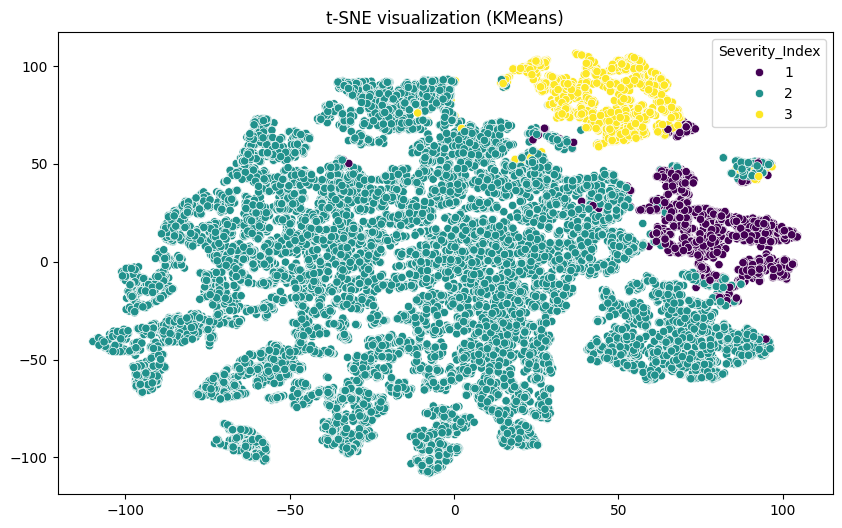

c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


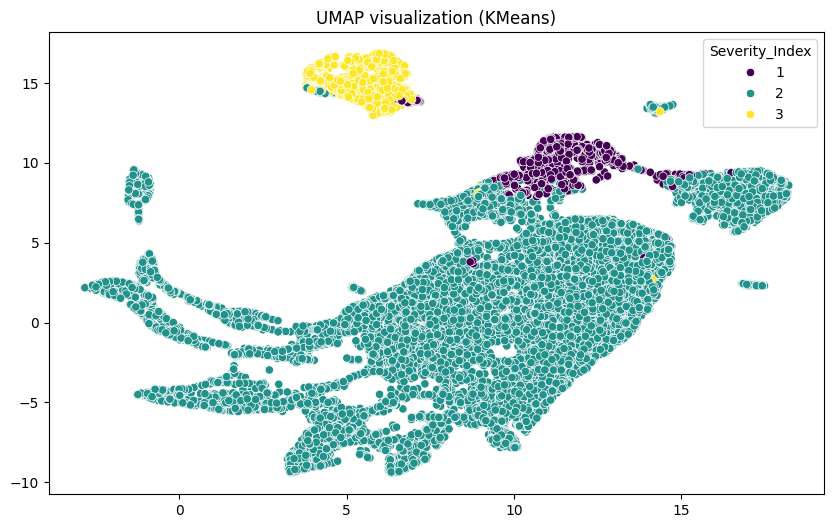

Kruskal-Wallis: H=0.5278797491541805, p=0.7680197157787271
Analysis complete. Full dataset with CCI integrated.


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20086.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# Load latent features and predictions
latent_features = pd.read_csv('latent_features_vae.csv')
tabnet_predictions = pd.read_csv('tabnet_predictions.csv')
data_merged = latent_features.merge(tabnet_predictions,on='Id',how='inner')

X = data_merged.drop(columns=['Id','Predicted_Health_Index'])
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

cluster_range=range(6,10)
sil_kmeans=[]
for n in cluster_range:
    km=KMeans(n_clusters=n,random_state=42)
    labels=km.fit_predict(X_scaled)
    sil_kmeans.append(silhouette_score(X_scaled, labels))

optimal_k = cluster_range[np.argmax(sil_kmeans)]
kmeans=KMeans(n_clusters=optimal_k,random_state=42).fit(X_scaled)
kmeans_labels=kmeans.labels_

sil_agg=[]
for n in cluster_range:
    agg=AgglomerativeClustering(n_clusters=n)
    labels=agg.fit_predict(X_scaled)
    sil_agg.append(silhouette_score(X_scaled,labels))

optimal_agg=cluster_range[np.argmax(sil_agg)]
agg=AgglomerativeClustering(n_clusters=optimal_agg)
agg_labels=agg.fit_predict(X_scaled)

neighbors=5
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
distances,indices=nbrs.kneighbors(X_scaled)
distances=np.sort(distances[:,neighbors-1],axis=0)
epsilon=distances[int(0.9*len(distances))]
db=DBSCAN(eps=epsilon,min_samples=5).fit(X_scaled)
dbscan_labels=db.labels_

def cluster_scores(X,labels):
    if len(set(labels))>1:
        sil=silhouette_score(X,labels)
        ch=calinski_harabasz_score(X,labels)
        db=davies_bouldin_score(X,labels)
    else:
        sil=ch=db=np.nan
    return sil,ch,db

sil_km,ch_km,db_km=cluster_scores(X_scaled,kmeans_labels)
sil_a,ch_a,db_a=cluster_scores(X_scaled,agg_labels)
if len(set(dbscan_labels))>1:
    sil_db,ch_db,db_db=cluster_scores(X_scaled,dbscan_labels)
else:
    sil_db=ch_db=db_db=np.nan

validation_df=pd.DataFrame({
    'Method':['KMeans','Agglomerative','DBSCAN'],
    'Silhouette':[sil_km,sil_a,sil_db],
    'CH':[ch_km,ch_a,ch_db],
    'DB':[db_km,db_a,db_db]
})
validation_df['Sil_rank']=validation_df['Silhouette'].rank(ascending=False)
validation_df['CH_rank']=validation_df['CH'].rank(ascending=False)
validation_df['DB_rank']=validation_df['DB'].rank(ascending=True)
validation_df['Avg_rank']=validation_df[['Sil_rank','CH_rank','DB_rank']].mean(axis=1)

# Function to count clusters (excluding noise for DBSCAN)
def get_n_clusters(labels):
    unique_lbls = set(labels)
    # If DBSCAN includes noise (-1), exclude it
    if -1 in unique_lbls:
        unique_lbls.remove(-1)
    return len(unique_lbls)

kmeans_n = get_n_clusters(kmeans_labels)
agg_n = get_n_clusters(agg_labels)
dbscan_n = get_n_clusters(dbscan_labels)

validation_df['n_clusters'] = [kmeans_n, agg_n, dbscan_n]

# Rank by n_clusters descending (more clusters = better)
validation_df['Cluster_rank'] = validation_df['n_clusters'].rank(ascending=False)

# Combine cluster preference
# Adjust weight to control how much cluster count influences the final selection.
# Positive weight means more clusters reduces the final rank (i.e. better).
weight = 0.5
validation_df['New_Avg_rank'] = validation_df['Avg_rank'] - weight*validation_df['Cluster_rank'].rank(ascending=True)

best_method=validation_df.loc[validation_df['New_Avg_rank'].idxmin(),'Method']

if best_method=='KMeans':
    final_labels=kmeans_labels
elif best_method=='Agglomerative':
    final_labels=agg_labels
else:
    final_labels=dbscan_labels

data_merged['Cluster']=final_labels
cluster_map=data_merged.groupby('Cluster')['Predicted_Health_Index'].mean().sort_values().reset_index()
cluster_map['Severity_Index']=range(1,len(cluster_map)+1)
mapping=cluster_map.set_index('Cluster')['Severity_Index'].to_dict()
data_merged['Severity_Index']=data_merged['Cluster'].map(mapping)

tsne=TSNE(n_components=2,random_state=42)
tsne_results=tsne.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
plt.title(f't-SNE visualization ({best_method})')
plt.show()

reducer=umap.UMAP(n_components=2,random_state=42)
umap_results=reducer.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=umap_results[:,0],y=umap_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
plt.title(f'UMAP visualization ({best_method})')
plt.show()

clusters=data_merged['Cluster'].unique()
normality_pvals=[]
for c in clusters:
    grp=data_merged[data_merged['Cluster']==c]['Predicted_Health_Index']
    stat,p=shapiro(grp)
    normality_pvals.append(p)

if any(p<0.05 for p in normality_pvals):
    groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
    kw_stat,kw_p=kruskal(*groups)
    print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
else:
    groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
    lv_stat,lv_p=levene(*groups)
    if lv_p<0.05:
        kw_stat,kw_p=kruskal(*groups)
        print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
    else:
        f_stat,f_p=f_oneway(*groups)
        print(f"ANOVA: F={f_stat}, p={f_p}")

print("Analysis complete. Full dataset with CCI integrated.")

c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


==== 3D K-Means Clustering Metrics (6..9 or 6..10) ====
   n_clusters  silhouette  calinski_harabasz  davies_bouldin  avg_rank
0           6    0.406316       19039.055953        0.847969  4.000000
1           7    0.430034       20549.829517        0.809390  2.333333
2           8    0.429316       19826.059085        0.734902  2.666667
3           9    0.447211       21941.315360        0.722229  1.000000

Chosen #clusters for 3D embedding: 9



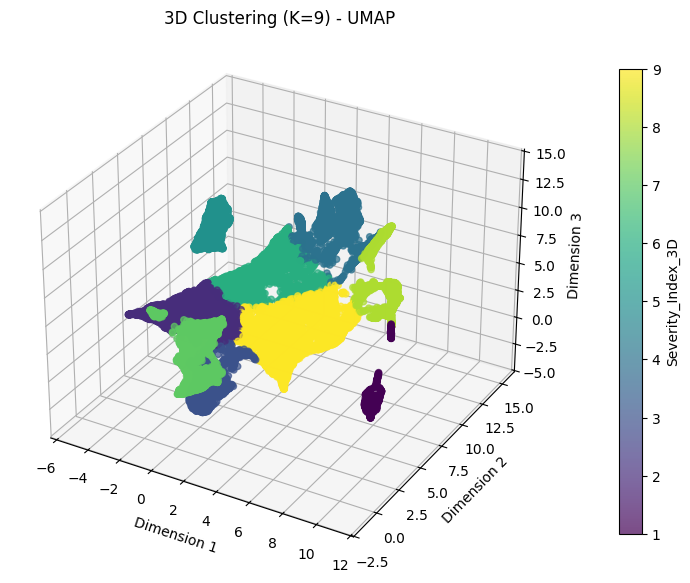

Final 3D KMeans (K=9): silhouette=0.447, CH=21941.3, DB=0.722
---- 3D clustering with expanded metrics complete ----


In [12]:
###########################################################
# ---- 3D Embedding & Clustering with Expanded Metrics ----
###########################################################
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 1) Create a 3D embedding (pick t-SNE or UMAP)
#    We'll demonstrate BOTH, then choose one:

# Option A: 3D t-SNE
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_3d_results = tsne_3d.fit_transform(X_scaled)

# Option B: 3D UMAP
reducer_3d = umap.UMAP(n_components=3, random_state=42)
umap_3d_results = reducer_3d.fit_transform(X_scaled)

# Choose which 3D embedding you want to use:
# embedding_3d = tsne_3d_results
embedding_3d = umap_3d_results  # <--- If you prefer UMAP in 3D

# 2) Run K-Means for cluster_range = [6..10] in the 3D space.
cluster_range_3d = range(6, 10)  # or range(6, 11) if you want 6..10 inclusive
kmeans_3d_metrics = []

for k_3d in cluster_range_3d:
    kmeans_3d = KMeans(n_clusters=k_3d, random_state=42)
    labels_3d = kmeans_3d.fit_predict(embedding_3d)
    
    # Compute 3 validation metrics
    sil_3d = silhouette_score(embedding_3d, labels_3d)
    ch_3d = calinski_harabasz_score(embedding_3d, labels_3d)
    db_3d = davies_bouldin_score(embedding_3d, labels_3d)
    
    kmeans_3d_metrics.append({
        'n_clusters': k_3d,
        'silhouette': sil_3d,
        'calinski_harabasz': ch_3d,
        'davies_bouldin': db_3d
    })

# 3) Convert metrics to a DataFrame for ranking
df_3d_eval = pd.DataFrame(kmeans_3d_metrics)

# Rank: higher silhouette/CH is better => descending rank; lower DB is better => ascending rank
df_3d_eval['sil_rank'] = df_3d_eval['silhouette'].rank(ascending=False)
df_3d_eval['ch_rank'] = df_3d_eval['calinski_harabasz'].rank(ascending=False)
df_3d_eval['db_rank'] = df_3d_eval['davies_bouldin'].rank(ascending=True)

# Average rank across all three
df_3d_eval['avg_rank'] = df_3d_eval[['sil_rank', 'ch_rank', 'db_rank']].mean(axis=1)

# Pick best cluster count based on minimal avg_rank
best_idx_3d = df_3d_eval['avg_rank'].idxmin()
best_k_3d = df_3d_eval.loc[best_idx_3d, 'n_clusters']

print("==== 3D K-Means Clustering Metrics (6..9 or 6..10) ====")
print(df_3d_eval[['n_clusters','silhouette','calinski_harabasz','davies_bouldin','avg_rank']])
print(f"\nChosen #clusters for 3D embedding: {best_k_3d}\n")

# 4) Fit final K-Means with best_k_3d in 3D embedding
kmeans_final_3d = KMeans(n_clusters=best_k_3d, random_state=42)
final_labels_3d = kmeans_final_3d.fit_predict(embedding_3d)

# 5) Attach new 3D clusters to data_merged
data_merged['Cluster_3D'] = final_labels_3d

# Create a "Severity_Index_3D" by ordering clusters on mean predicted health index
cluster_map_3d = (
    data_merged
    .groupby('Cluster_3D')['Predicted_Health_Index']
    .mean()
    .sort_values()
    .reset_index()
)
cluster_map_3d['Severity_Index_3D'] = range(1, len(cluster_map_3d)+1)
mapping_3d = cluster_map_3d.set_index('Cluster_3D')['Severity_Index_3D'].to_dict()
data_merged['Severity_Index_3D'] = data_merged['Cluster_3D'].map(mapping_3d)

# 6) 3D scatter plot (color-coded by Severity_Index_3D)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter_3d = ax.scatter(
    embedding_3d[:, 0],
    embedding_3d[:, 1],
    embedding_3d[:, 2],
    c=data_merged['Severity_Index_3D'],
    cmap='viridis',
    alpha=0.7
)

ax.set_title(f"3D Clustering (K={best_k_3d}) - {'UMAP' if embedding_3d is umap_3d_results else 't-SNE'}")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

# Add a colorbar
cbar = plt.colorbar(scatter_3d, ax=ax, fraction=0.03, pad=0.09)
cbar.set_label("Severity_Index_3D")

plt.show()

# 7) Optional: If you want a quick stats check across clusters in 3D:
#    We can re-use the cluster_scores function, but now pass embedding_3d + final_labels_3d
sil_3d_final, ch_3d_final, db_3d_final = cluster_scores(embedding_3d, final_labels_3d)
print(f"Final 3D KMeans (K={best_k_3d}): silhouette={sil_3d_final:.3f}, "
      f"CH={ch_3d_final:.1f}, DB={db_3d_final:.3f}")

print("---- 3D clustering with expanded metrics complete ----")
